В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [30]:
import numpy as np

In [31]:
def sigmoid (z):
    return 1/(1 + np.exp(-z))

z = np.array([-2, -1, 0, 1, 2])
sigma_z = sigmoid(z)
print(sigma_z) 


[0.11920292 0.26894142 0.5        0.73105858 0.88079708]




#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [32]:
def hypothesis(theta, X):
    return sigmoid(np.dot(theta, X.T))

theta = np.array([0.5, -0.5])
X = np.array([[1, 2], [1, -1],[1, 0],[1, 1]])

value = hypothesis(theta, X)
print(f'Array of param {np.dot(theta, X.T)}')
print(f'Final value: {value}')

Array of param [-0.5  1.   0.5  0. ]
Final value: [0.37754067 0.73105858 0.62245933 0.5       ]


#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [33]:
def compute_gradient(theta, X, y):
    subtract = hypothesis(theta, X) - y
    multiple = np.dot(subtract, X)
    # sum = np.sum(multiple)
    # divide = sum / len(y)
    divide = multiple / len(y)
    return divide

y = np.array([1, 0, 1, 0])  

gradient = compute_gradient(theta, X, y)
print(f'Gradient: {gradient}')

Gradient: [ 0.05776464 -0.36899431]



#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [34]:

def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    theta = np.zeros(X.shape[1]) # нульові параметри
    m = len(y)
    errors = [] 
    for _ in range(epochs):
        gradient = compute_gradient(theta, X, y)
        theta = theta - lr * gradient
    return theta

final_theta = full_batch_gradient_descent(X, y)
print(f'theta: {final_theta}')

theta: [-0.2893693   0.77655125]


#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [35]:
def predict_proba(theta, X):
    y_probability = hypothesis(theta, X)
    return y_probability

def predict(theta, X, threshold=0.5):
    array = (predict_proba(theta, X) >= threshold).astype(int)
    return array

def accuracy(y_true, y_pred):
    sum = np.sum(y_true == y_pred)
    accuracy = sum / len(y_true)
    return accuracy


In [36]:
y_prob = predict_proba(final_theta, X)
print(f'Prob of values 1: {y_prob}')

y_pred = predict(final_theta, X)
print(f'Predicted values: {y_pred}')
print('Ground truth: ', y)

acc = accuracy(y, y_pred)
print(f'Accuracy: {acc}')


Prob of values 1: [0.77966809 0.25617965 0.42815828 0.61944235]
Predicted values: [1 0 0 1]
Ground truth:  [1 0 1 0]
Accuracy: 0.5


In [37]:
import matplotlib.pyplot as plt

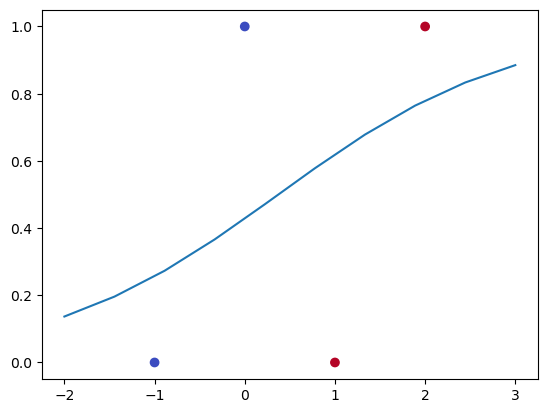

In [38]:
plt.scatter(X[:, 1], y, c=y_pred, cmap='coolwarm')
x_values = np.linspace(-2, 3, 10)
y_values = 1 / (1 + np.exp(-(final_theta[0] + final_theta[1] * x_values)))
plt.plot(x_values, y_values)

# Висновок

- На даному прикладі наша точність 50%, бо як видно з малюнку нижче - неможливо розділити точки на два класи без (якщо поміняти для них лейбли - то вони гарно розділяються)
- при тому модна бачити що для крайніх точок ймовірність *0.77966809*, *0.25617965* дуже наближена до їх справжніх лейблів 1 та 0 відповідно.
- Тоді як ймовірність для сердинних точок *0.42815828*, *0.61944235* знаходиться на грані з 50% і їх складно відділити 



Prob of values 1: [0.77966809 0.25617965 0.42815828 0.61944235]
Predicted values: [1 0 0 1]
Ground truth:  [1 0 0 1]
Accuracy: 1.0


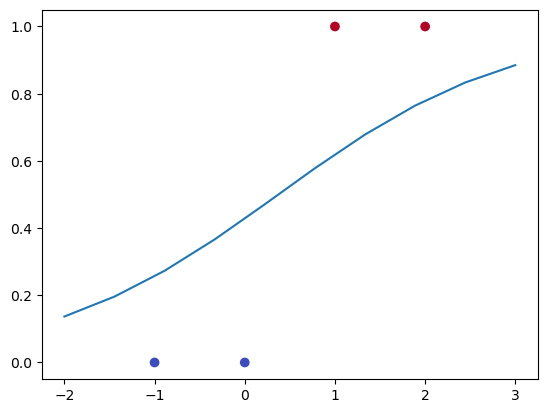

In [ ]:
# РОзрахунки для інших лейблів
y = np.array([1, 0, 0, 1])  
y_prob = predict_proba(final_theta, X)
print(f'Prob of values 1: {y_prob}')

y_pred = predict(final_theta, X)
print(f'Predicted values: {y_pred}')
print('Ground truth: ', y)

acc = accuracy(y, y_pred)
print(f'Accuracy: {acc}')
plt.scatter(X[:, 1], y, c=y_pred, cmap='coolwarm')
# plt.scatter(X[:, 1], y_prob, c=y_pred, cmap='coolwarm')

x_values = np.linspace(-2, 3, 10)
y_values = 1 / (1 + np.exp(-(final_theta[0] + final_theta[1] * x_values)))
plt.plot(x_values, y_values)